## Kendrick Kee

## 7366814

## Assignment 2 Task 2

In [ ]:
#import tensorflow.compat.v1 as tf
import tensorflow.compat.v2 as tf
#tf.disable_v2_behavior()

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Importing the data
df = pd.read_csv('magic04.data', header = None)

In [ ]:
#Assign column names
df.columns = ['fLength','fWidth','fSize','fConc','fConc1',
               'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDsit', 'target']

In [ ]:
#printing to check if column names have been assigned 
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDsit,target
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


As observed, there are 11 columns that we will be working with, and 19020 rows of data. 

In [ ]:
# Check if any missing data and data types
df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   5 non-null      float64
 1   fWidth    5 non-null      float64
 2   fSize     5 non-null      float64
 3   fConc     5 non-null      float64
 4   fConc1    5 non-null      float64
 5   fAsym     5 non-null      float64
 6   fM3Long   5 non-null      float64
 7   fM3Trans  5 non-null      float64
 8   fAlpha    5 non-null      float64
 9   fDsit     5 non-null      float64
 10  target    5 non-null      object 
dtypes: float64(10), object(1)
memory usage: 568.0+ bytes


In [ ]:
##Encode the class 
newdf = pd.Series(df['target'], dtype = "category")
df['target'] = newdf.cat.codes

##### Encoding gamma and hadron to 0,1 instead of g and h

In [ ]:
#making sure that all data types are numerical
df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   5 non-null      float64
 1   fWidth    5 non-null      float64
 2   fSize     5 non-null      float64
 3   fConc     5 non-null      float64
 4   fConc1    5 non-null      float64
 5   fAsym     5 non-null      float64
 6   fM3Long   5 non-null      float64
 7   fM3Trans  5 non-null      float64
 8   fAlpha    5 non-null      float64
 9   fDsit     5 non-null      float64
 10  target    5 non-null      int8   
dtypes: float64(10), int8(1)
memory usage: 533.0 bytes


#### making sure all data types are numerical

In [ ]:
#view the datafram
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDsit,target
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,1
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,1
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,1
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,1


In [ ]:
X = df.drop(['target'],axis=1)
y = df.target

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42069)

#### splitting dataset 70% for training and 30% for testing.

In [ ]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

#### importing keras for ANN implementation

In [ ]:
classifier = Sequential()
# Adding the input layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

# Adding the first hidden layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'softmax'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying ADAM optimizer on the whole ANN
classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

1332/1332 [==============================] - 2s 1ms/step - loss: 0.3440 - accuracy: 0.8540
Train score: 0.3439751863479614
Train accuracy: 0.8539882898330688


#### Created an ANN with 1 input layer and 1 hidden layer and 1 output layer. Each layer is initiated with 5 neurons with the input layer having 'relu' activation function, hidden layers having 'softmax' activation function an the output layer having the 'sigmoid' activation function.

#### In addition, using 'adam' instead of the default sigmoid gradiant decent as an optimization function. 

#### Using these settings, the accuracy of the model is 85% on the training set with the training score of 0.34



In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 55        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

571/571 [==============================] - 1s 914us/step - loss: 0.3400 - accuracy: 0.8549
Test score: 0.33995169401168823
Test accuracy: 0.8548895716667175


#### Using the model to predict unseen data, the testing accuracy is 85% which is equal to the accuracy of the training dataset, therefore we can conclude that no overfitting has ocurred and the model has achieved a level of generalization.

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 15.0, 'Predicted label')

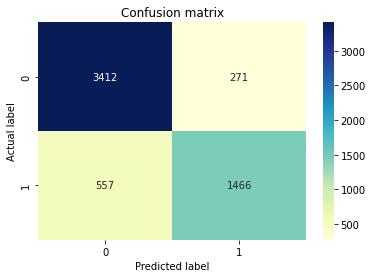

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### here we can observe that majority of the labels are classified in-correctly, with 557 labels mis-classified as 0 (gamma) and 271 mis-classified as 1 (hadron)

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      3683
           1       0.84      0.72      0.78      2023

    accuracy                           0.85      5706
   macro avg       0.85      0.83      0.84      5706
weighted avg       0.85      0.85      0.85      5706



In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
y_prob = classifier.predict(X_test)

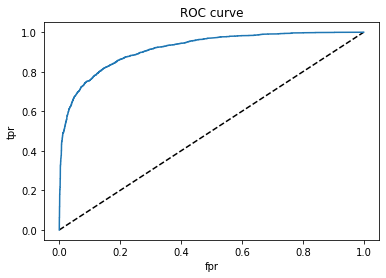

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_prob)

0.9178085602323216

#### Plotting the ROC curve, we can see that to model is not underfitted as it is well above the "random classification" line and its area under the curve is 0.917 which is very good.

# Hyper Parameter Tuning

In [ ]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import *

In [ ]:
# Define a grid for hyper parameter tuning
# define a grid of the hyperparameter search space
no_of_neurons = [6,7,8]
no_of_layers = [2,3,4]
l1 = [0.01,0.1]
l2 = [0.01,0.1]
# create a dictionary from the hyperparameter grid
grid = dict(
  no_of_neurons = no_of_neurons,
  no_of_layers = no_of_layers,
  l1 = l1,
  l2 = l2
)

#### Defining a grid of a list of neuron counts, list of possible layers and 2 values for l1 and l2 regularizer

## WARNING, CELL BELOW TAKES 3 HOURS TO COMPLETE

In [ ]:
#WARNING THIS CELL WILL TAKE 3 HOURS TO COMPLETE THE GRID ABOVE
best_accuracy,best_score,best_layers,best_neuron,best_l1,best_l2 = 0,0,0,0,0,0

for l1_val in grid['l1']:

  for l2_val in grid['l2']:

    for neuron_count in grid['no_of_neurons']:

      for layer_count in grid['no_of_layers']:

        grid_model = Sequential()
        #initializing the input layer
        grid_model.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

        for x in range(layer_count):

          #Creating x hidden layer
          grid_model.add(Dense(units = neuron_count, kernel_initializer = 'uniform', activation = 'relu', kernel_regularizer = l1_l2(l1=l1_val,l2=l2_val)))


        #initializing the output layer
        # Adding the output layer
        grid_model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))
        #compiling ANN
        grid_model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
        # Fitting the ANN to the Training set
        history1 = grid_model.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

        score, acc = grid_model.evaluate(X_train, y_train,
                                  batch_size=10)
        if best_accuracy < acc:
          best_accuracy = acc
          best_score = score
          best_layers = layer_count
          best_neuron = neuron_count
          best_l1 = l1_val
          best_l2 = l2_val
print(f'The best parameters from grid search was layers: {best_layers}, neuron count of: {best_neuron}, with a l1 value of: {best_l1} and a l2 value of: {best_l2}')
print("="*20)
print(f'The given parameters had a accuracy of: {best_accuracy} and score of: {best_score}')

1332/1332 [==============================] - 2s 2ms/step - loss: 5.4081 - accuracy: 0.6496
The best parameters from grid search was layers: 2, neuron count of: 6, with a l1 value of: 0.01 and a l2 value of: 0.1
The given parameters had a accuracy of: 0.8691602945327759 and score of: 0.3677224814891815


### Using Keras, I performed a grid search to determine the best hyperparameter values, the maximum accuracy achieved from the grid was 86.9% which is a 2% improvement

### The best parameters from our grid is 2 layers, 36 neurons and an l1 value and l2 value of 0.01

## Creating Model based on best parameters for reporting

In [ ]:
classifier_tuned = Sequential()
# Adding the input layer
classifier_tuned.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
for layer_x in range(2):
  #Adding x layers with neuron count and L1, L2
  classifier_tuned.add(Dense(units = 36, kernel_initializer = 'uniform', activation = 'relu', kernel_regularizer = l1_l2(l1=0.01,l2=0.01)))

# Adding the output layer
classifier_tuned.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))
# Compiling the ANN | 
classifier_tuned.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history1 = classifier_tuned.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

score, acc = classifier_tuned.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

1332/1332 [==============================] - 1s 1ms/step - loss: 0.3620 - accuracy: 0.8725
Train score: 0.36201488971710205
Train accuracy: 0.8725401759147644


#### As we can see the model now performs better than the baseline with a 2% increase with an accuracy of 87%

#### Using the tuned paramters to generate values for reporting

In [ ]:
classifier_tuned.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 36)                396       
                                                                 
 dense_8 (Dense)             (None, 36)                1332      
                                                                 
 dense_9 (Dense)             (None, 1)                 37        
                                                                 
Total params: 1,875
Trainable params: 1,875
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Predicting the Test set results
y1_pred1 = classifier_tuned.predict(X_test)
y1_pred1 = (y_pred > 0.5)

score, acc = classifier_tuned.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

571/571 [==============================] - 1s 1ms/step - loss: 0.3808 - accuracy: 0.8663
Test score: 0.3808225393295288
Test accuracy: 0.8662810921669006


#### The accuracy of the tuned model on the testing dataset is 86.6% which is higher than the prior accuracy of 85.4%. The test score is 0.307. Accuracy is also similar to training set accuracy which shows that model has no sign of overfitting.

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y1_pred1)

Text(0.5, 15.0, 'Predicted label')

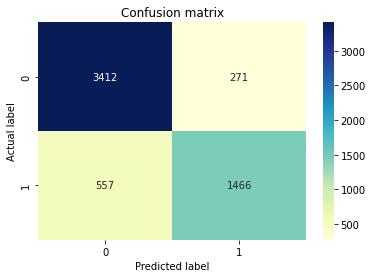

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### here we can observe that majority of the labels are classified correctly, with 557 labels mis-classified as 0 (gamma) and 271 mis-classified as 1 (hardon)

In [ ]:
print(classification_report(y_test,y1_pred1))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      3683
           1       0.84      0.72      0.78      2023

    accuracy                           0.85      5706
   macro avg       0.85      0.83      0.84      5706
weighted avg       0.85      0.85      0.85      5706



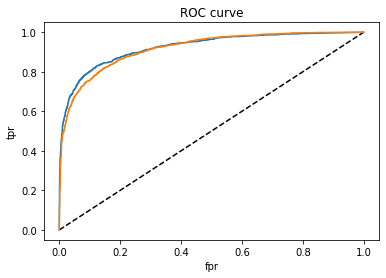

In [ ]:
y_pred_proba1 = classifier_tuned.predict(X_test)

fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_proba1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr1,tpr1, label='ANN1')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

#### Here we see the ROC curve for both the tuned and pre-tuned models, both curves are incredible close together which is expected as the difference in accuracy of both models are withing a few % in range. But we can observe that the ROC curve for the tuned model has a larger AUC.

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba1)

0.9242785485247107

#### The AUC for the tuned model is 0.924 which is higher than the pre-tuned version as expected from the plot

Text(0.5, 1.0, 'Learning rate vs. loss')

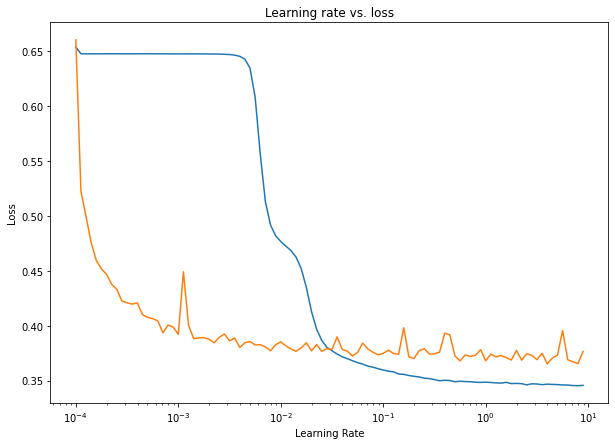

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.semilogx(lrs, history1.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")

## Observations

Here we can observe that greater the learning rate, the smaller the loss of the model. We can see that the pre-tuned model, the loss is under going an exponential decay and stablises at around the 0.38 mark. While for the learning rate for the tuned model, we can observe a break in plateu at 10^-2 learning rate mark for loss and a massive drop in Loss occurs and stablises at around 0.34 mark.